In [1]:
import pandas as pd


## Load Dataset

In [6]:
basicPath = "~/Git/DSSchool_Study/online_livebook/sf-crime/"

In [7]:
train = pd.read_csv(basicPath + "/train.csv")
test = pd.read_csv(basicPath + "/test.csv")
submit = pd.read_csv(basicPath + "/sampleSubmission.csv")

In [9]:
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


- Descript Column은 test에는 없는 데이터
- 때문에 feature로 이용할 수는 없음. train 데이터에 대한 부연설명으로 이용

In [10]:
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Explore

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Dates

In [12]:
train["Dates"].dtypes

dtype('O')

- dtype('O'): Objects, String
- 문자열 데이터이기 때문에 datetime으로 변경해주어야 함

In [13]:
train["Dates"] = pd.to_datetime(train["Dates"])
train.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [15]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

In [16]:
print(train.shape)
train.head()

(878049, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


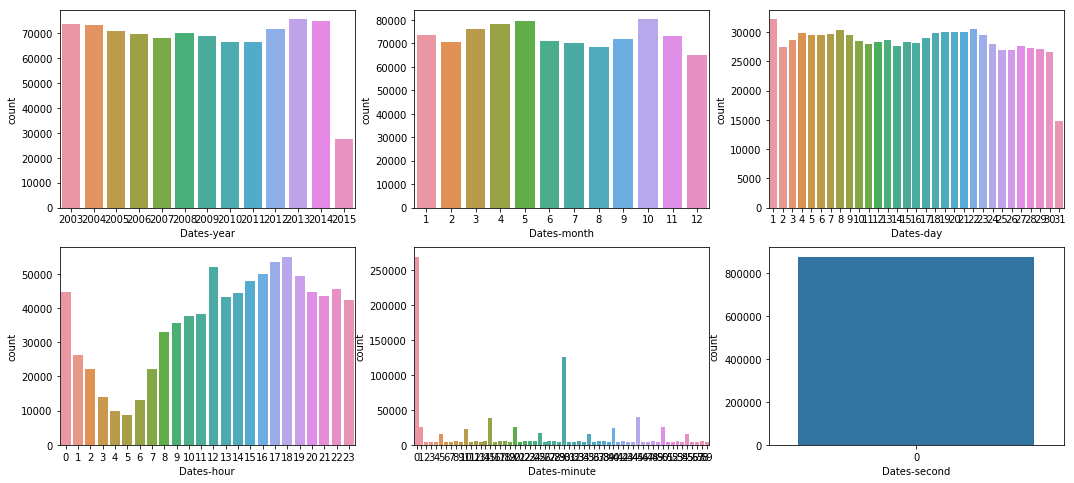

In [33]:
figure, (axis) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

row1 = axis[0]
row2 = axis[1]

sns.countplot(data=train, x="Dates-year", ax=row1[0])
sns.countplot(data=train, x="Dates-month", ax=row1[1])
sns.countplot(data=train, x="Dates-day", ax=row1[2])
sns.countplot(data=train, x="Dates-hour", ax=row2[0])
sns.countplot(data=train, x="Dates-minute", ax=row2[1])
sns.countplot(data=train, x="Dates-second", ax=row2[2])

- 데이터를 시각화 하기 전, 데이터의 결과에 대해 미리 생각해보고 결과 분석하기
  - year에 대해서는 크게 영향을 미치지 않았을 것이다. but 2015년은 범죄발생 빈도가 크게 낮다. why?
  - month는 차이는 있지만 그렇게 크지는 않다.
  - day는 1일은 높고, 31일이 매우 낮은데 why?
  - hour: 12시, 00시 수치가 크다.
  - minute: 분은 그렇게 중요하지는 않을 것 같은데 왜 그래프가 00분, 30분 등등으로 나타날까?
  - second: 모두 0초로 기록이 잘 되고 있지 않음

#### 결과분석

In [41]:
for year in range(2003, 2016):
    print(year, train[train["Dates-year"] == year].shape)

2003 (73902, 15)
2004 (73422, 15)
2005 (70779, 15)
2006 (69909, 15)
2007 (68015, 15)
2008 (70174, 15)
2009 (69000, 15)
2010 (66542, 15)
2011 (66619, 15)
2012 (71731, 15)
2013 (75606, 15)
2014 (74766, 15)
2015 (27584, 15)


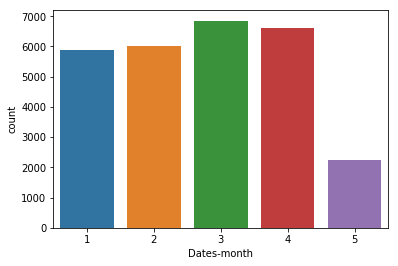

In [46]:
lastYear = train[train["Dates-year"] == 2015]
sns.countplot(data=lastYear, x="Dates-month")

- 2015년에 데이터 수가 적은 이유는 5월까지밖에 데이터가 없기 때문!

## X, Y

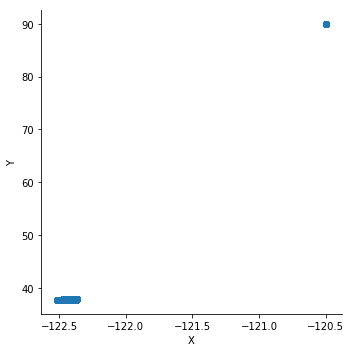

In [60]:
# train[["X", "Y"]].head()
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)